In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns

# Helper Function

In [2]:
# reading txt files of our format
def readfile(type, nodes, samples, scale): 
    with open(f"sim_data/{type}_nodes_{nodes}_samples_{samples}_scale_{scale}.txt") as f: 
        contents = [float(line.strip()) for line in f.readlines()]
    return contents

# calculate avg. distance between true params and fitted. 
def avg_distance(x_true, x_fit): 
    return np.mean([np.abs(x - y) for x, y in zip(x_true, x_fit)])

# Overall error from hJ true to hJ inferred

## Read data

In [3]:
l = []
for nodes in [5, 10, 20]: 
    for samples in [100, 1000, 10000]: 
        for scale in [0.1, 1.0, 3.0]: 
            f_true = readfile("hJ", nodes, samples, scale)
            f_fit = readfile("mulitipliers", nodes, samples, scale)
            f_err = avg_distance(f_true, f_fit)
            l.append((nodes, samples, scale, f_err))

d = pd.DataFrame(l, columns = ["Nodes", "Samples", "Scale", "Avg. Error"])


## Plot data

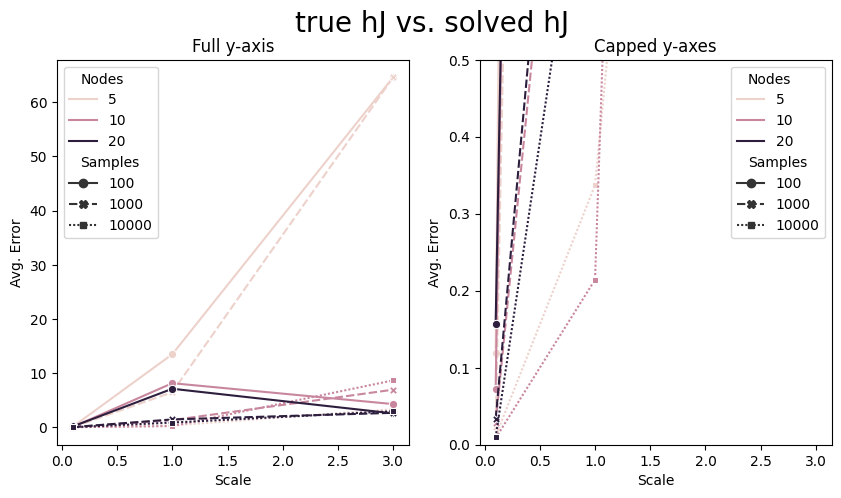

In [8]:
fig, axes = plt.subplots(1, 2, figsize = (10, 5))
sns.lineplot(
    ax = axes[0],
    data = d,
    x = "Scale",
    y = "Avg. Error",
    hue = "Nodes",
    style = "Samples",
    markers = True
)
axes[0].set_title("Full y-axis")
sns.lineplot(
    ax = axes[1],
    data = d,
    x = "Scale",
    y = "Avg. Error",
    hue = "Nodes",
    style = "Samples",
    markers = True 
)
axes[1].set_title("Capped y-axes")
axes[1].set_ylim(0, 0.5)
plt.suptitle("true hJ vs. solved hJ", fontsize = 20)
plt.plot();

### Left plot: 
Shows that it just completely blows up. There is some weird effect where it blows up more for a low number of nodes (which should be easier). 

### Right plot: 
Shows that we can never recover parameters with high scale (i.e. extreme hJ values). Sometimes we can achieve it with medium scale, but their implementation of MPF only appears to perform well for low scale (e.g. 0.1 as they show in their tutorial). 

# Qualitative Picture

## read data (5, 1000, 1.0)

In [5]:
f_true = readfile("hJ", 5, 1000, 1.0)
f_fit = readfile("mulitipliers", 5, 1000, 1.0)

## Plot data

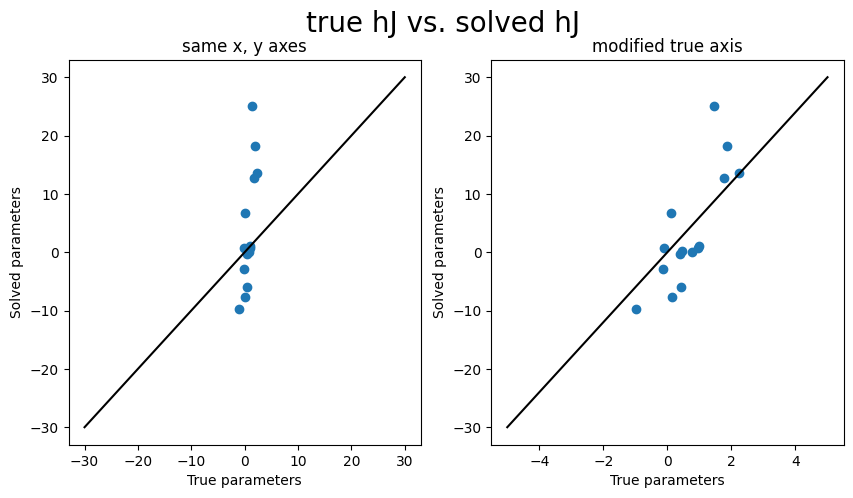

In [7]:
fig, ax = plt.subplots(1, 2, figsize = (10, 5))
ax[0].plot(f_true, f_fit, 'o')
ax[0].plot([-30,30], [-30,30], 'k-')
ax[0].set(
    xlabel='True parameters', 
    ylabel='Solved parameters')
ax[0].set_title('same x, y axes')

ax[1].plot(f_true, f_fit, 'o')
ax[1].plot([-5,5], [-30,30], 'k-')
ax[1].set(
    xlabel='True parameters', 
    ylabel='Solved parameters')
ax[1].set_title('modified true axis')
plt.suptitle('true hJ vs. solved hJ', fontsize = 20)
plt.plot();

### Take-away
It appears that their algorithm fits way too extreme parameters (left plot), but that it actually correlates well with the true parameters if we scale it (right plot). In the right plot I just limited the axis for the true parameters, and now it suddenly looks reasonable. I suspect that they might recover okay correlations, but that they cannot find the right set of true underlying parameters. I.e., it might be the issue we discussed where it "compensates", such that if it believes that one parameters should be e.g. 10 (which is actually 1), it has to fit another parameter to be -10 (which is actually -1). 